In [1]:
import os
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate, build_logistic_classifier, post_processing_function, plot_beta_errors

ms = load_from_json(deepcopy(math_spec_json))

In [2]:
T = 50
blocks = ["Log Simulation Data Mechanism"] + ["Price Movements Wiring",
            "Conversions Wiring",
            "Mine Block Wiring",
            "Unlock Tokens Wiring",
            "Log Simulation Data Mechanism",] * T




            
experiment = {"Name": "Test",
               "Param Modifications": None,
               "State Modifications": None,
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[])

print(df)

Placeholder has no control action options
    Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0              NaN             NaN           -0.0001            0.0001   
1        -4.931074    -2154.130687           -0.0001            0.0001   
2        -4.864398    -2073.143732           -0.0001            0.0001   
3        -4.771831     -755.630115           -0.0001            0.0001   
4         4.698477     3988.856428           -0.0001            0.0001   
5        -4.647885     -286.012830           -0.0001            0.0001   
6        -4.613612       98.705965           -0.0001            0.0001   
7       -13.680152    -3974.647537           -0.0001            0.0001   
8         4.129785     3776.469159           -0.0001            0.0001   
9        -4.680885     -119.306697           -0.0001            0.0001   
10       -4.695773      267.891218           -0.0001            0.0001   
11      -13.191765    -3465.399702           -0.0001            0.0001

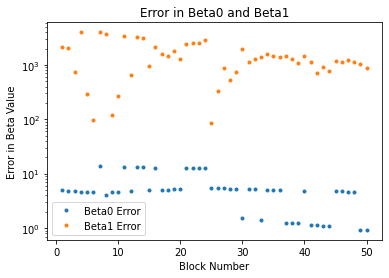

In [3]:
plot_beta_errors(df)

In [4]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Qi Supply,Quai Supply,Locked Qi Supply,Locked Quai Supply,Block Number,Block Difficulty,...,Zones per Region,K Qi,K Quai,Quai Price,Qi Price,Time,Delta Time,Mined Ratio,Beta0 Error,Beta1 Error
0,NaN,NaN,-0.0001,0.0001,0.000000e+00,3.000000e+09,0.000000e+00,2.370000e+09,0,6000.000000,...,2,1.000000,1,1.000000,1.000000,0.000000,0,NaN,NaN,NaN
1,-4.931074,-2154.130687,-0.0001,0.0001,2.333081e+09,2.999458e+09,2.333081e+09,2.370000e+09,1,5973.032460,...,2,0.789161,1,0.951767,0.962876,0.001123,0,0.002692,4.930974,2154.130787
2,-4.864398,-2073.143732,-0.0001,0.0001,2.333113e+09,2.999458e+09,2.333113e+09,2.370000e+09,2,5944.609562,...,2,0.633242,1,0.915921,0.908090,0.001660,0,0.003497,4.864298,2073.143832
3,-4.771831,-755.630115,-0.0001,0.0001,2.333152e+09,2.999458e+09,2.333152e+09,2.370000e+09,3,5915.876142,...,2,0.585353,1,0.859560,0.872632,0.002030,0,0.001948,4.771731,755.630215
4,4.698477,3988.856428,-0.0001,0.0001,2.333180e+09,2.999458e+09,2.333180e+09,2.370000e+09,4,5887.010512,...,2,0.355113,1,0.822510,0.857463,0.002298,0,0.003594,4.698577,3988.856328
5,-4.647885,-286.012830,-0.0001,0.0001,2.333192e+09,2.999459e+09,2.333192e+09,2.370001e+09,5,5858.149967,...,2,0.344889,1,0.792341,0.836560,0.002515,0,0.009823,4.647785,286.012930
6,-4.613612,98.705965,-0.0001,0.0001,2.333208e+09,2.999459e+09,2.333208e+09,2.370001e+09,6,5829.337530,...,2,0.348353,1,0.770539,0.814709,0.002696,0,0.006082,4.613512,98.705865
7,-13.680152,-3974.647537,-0.0001,0.0001,2.333223e+09,2.999459e+09,2.333223e+09,2.370001e+09,7,5800.588972,...,2,0.301849,1,0.737378,0.805718,0.002848,0,0.007887,13.680052,3974.647637
8,4.129785,3776.469159,-0.0001,0.0001,2.333235e+09,2.999459e+09,2.333235e+09,2.370001e+09,8,5771.937732,...,2,0.173387,1,0.716581,0.818752,0.002983,0,0.009208,4.129885,3776.469059
9,-4.680885,-119.306697,-0.0001,0.0001,2.333247e+09,2.999459e+09,2.333247e+09,2.370001e+09,9,5743.385295,...,2,0.171353,1,0.686668,0.813224,0.003101,0,0.004210,4.680785,119.306797


In [5]:
T = 100
blocks = ["Log Simulation Data Mechanism"] + ["Price Movements Wiring",
            "Conversions Wiring",
            "Mine Block Wiring",
            "Unlock Tokens Wiring",
            "Log Simulation Data Mechanism",] * T




            
experiment = {"Name": "Test",
               "Param Modifications": None,
               "State Modifications": None,
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[])

Placeholder has no control action options


In [6]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Qi Supply,Quai Supply,Locked Qi Supply,Locked Quai Supply,Block Number,Block Difficulty,Number of Regions,Zones per Region,K Qi,K Quai,Quai Price,Qi Price,Time,Delta Time,Mined Ratio
0,NaN,NaN,-0.0001,0.0001,0.000000e+00,3.000000e+09,0.000000e+00,2.370000e+09,0,6000.000000,2,2,1.000000,1,1.000000,1.000000,0.000000,0,NaN
1,4.931153,2132.726221,-0.0001,0.0001,5.342082e+04,3.000000e+09,5.342082e+04,2.370000e+09,1,5972.986142,2,2,0.794084,1,0.942798,0.960792,0.001106,0,0.001642
2,-4.835236,-2995.353025,-0.0001,0.0001,9.142779e+04,3.000000e+09,9.142779e+04,2.370000e+09,2,5944.613556,2,2,0.559041,1,0.901668,0.930578,0.001661,0,0.002635
3,4.780825,766.965464,-0.0001,0.0001,1.185710e+05,3.000000e+09,1.185710e+05,2.370000e+09,3,5915.902022,2,2,0.515371,1,0.861571,0.916947,0.002039,0,0.003698
4,4.762650,951.705513,-0.0001,0.0001,1.608121e+05,3.000000e+09,1.608121e+05,2.370000e+09,4,5887.044086,2,2,0.467194,1,0.816229,0.886372,0.002310,0,0.000592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-10.537531,-26.286148,-0.0001,0.0001,5.760174e+08,2.998800e+09,5.760174e+08,2.370009e+09,96,3717.092964,2,2,0.607939,1,0.011291,7.872830,0.005277,0,0.008579
97,-14.449845,-1090.054675,-0.0001,0.0001,5.760311e+08,2.998800e+09,5.760311e+08,2.370009e+09,97,3698.519242,2,2,0.593700,1,0.011154,8.085572,0.005284,0,0.008546
98,-14.440682,-807.934745,-0.0001,0.0001,5.760447e+08,2.998800e+09,5.760447e+08,2.370009e+09,98,3680.038314,2,2,0.583306,1,0.010732,8.019565,0.005291,0,0.008671
99,-14.425597,-609.878001,-0.0001,0.0001,5.760661e+08,2.998800e+09,5.760661e+08,2.370009e+09,99,3661.649464,2,2,0.575679,1,0.010380,8.008536,0.005298,0,0.003295
